In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

from scipy.stats import linregress

In [2]:
results_dir = "anacal_results_density240/"

In [3]:
catalogs = torch.load(results_dir + "catalogs.pt")
true_shear1 = torch.tensor([cat[0]['g1'] for cat in catalogs])
true_shear2 = torch.tensor([cat[0]['g2'] for cat in catalogs])

/tmp/ipykernel_328769/3485832488.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  catalogs = torch.load(results_dir + "catalogs.pt")


In [4]:
num_images = true_shear1.shape[0]
print(f"Number of images: {num_images}")

Number of images: 2000


In [5]:
e1_sum = torch.load(results_dir + "e1_sum.pt")[:num_images]
e1g1_sum = torch.load(results_dir + "e1g1_sum.pt")[:num_images]
e2_sum = torch.load(results_dir + "e2_sum.pt")[:num_images]
e2g2_sum = torch.load(results_dir + "e2g2_sum.pt")[:num_images]
num_detections = torch.load(results_dir + "num_detections.pt")[:num_images]

/tmp/ipykernel_328769/4236573018.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  e1_sum = torch.load(results_dir + "e1_sum.pt")[:num_images]
/tmp/ipykernel_328769/423657

In [6]:
e1_avg = e1_sum / num_detections
e2_avg = e2_sum / num_detections
R1 = e1g1_sum.sum() / num_detections.sum()
R2 = e2g2_sum.sum() / num_detections.sum()
print(f"Estimated R1 = {R1}")
print(f"Estimated R2 = {R2}")
est_shear1 = e1_avg / R1
est_shear2 = e2_avg / R2

Estimated R1 = 0.18563394248485565
Estimated R2 = 0.20001819729804993


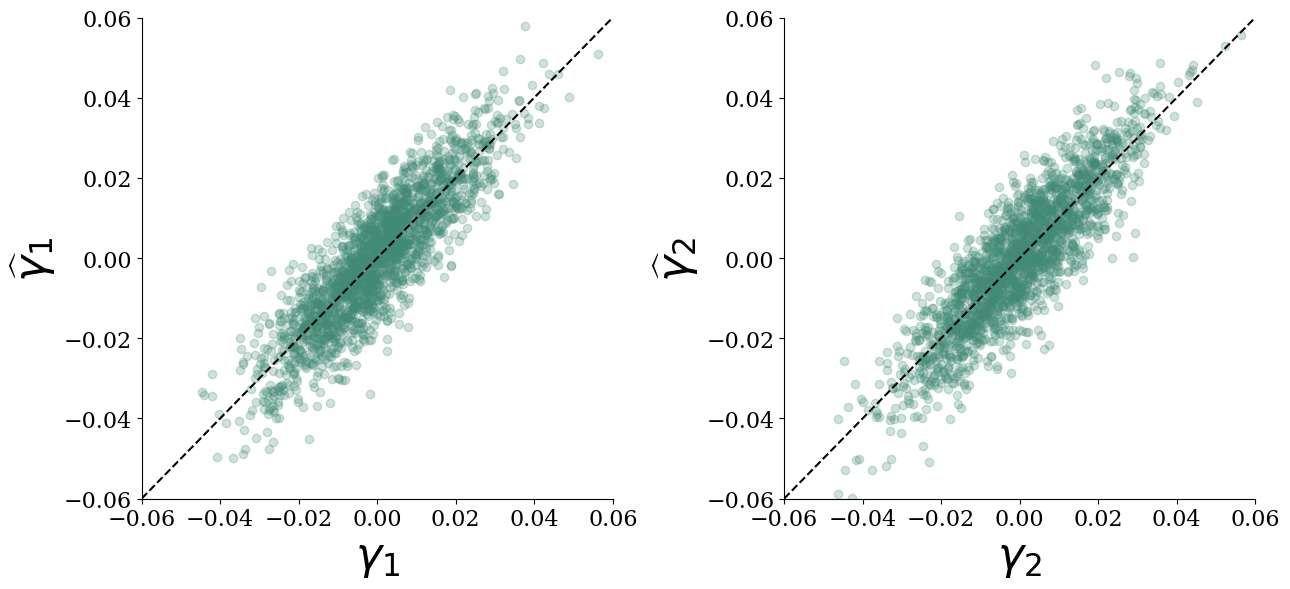

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))

fontsize = 32
ticklabelsize = 16

_ = ax[0].scatter(true_shear1, est_shear1, color = '#418a74', alpha = 0.25)
_ = ax[0].axline((0,0), slope = 1, linestyle = 'dashed', color = 'black')
_ = ax[0].set_xlabel("$\gamma_1$", fontsize=fontsize)
_ = ax[0].set_ylabel("$\widehat{\gamma}_1$", fontsize=fontsize)
_ = ax[0].tick_params(axis='both', which='major', labelsize=ticklabelsize)
_ = ax[0].set_xlim(-0.06, 0.06)
_ = ax[0].set_ylim(-0.06, 0.06)

_ = ax[1].scatter(true_shear2, est_shear2, color = '#418a74', alpha = 0.25)
_ = ax[1].axline((0,0), slope = 1, linestyle = 'dashed', color = 'black')
_ = ax[1].set_xlabel("$\gamma_2$", fontsize=fontsize)
_ = ax[1].set_ylabel("$\widehat{\gamma}_2$", fontsize=fontsize)
_ = ax[1].tick_params(axis='both', which='major', labelsize=ticklabelsize)
_ = ax[1].set_xlim(-0.06, 0.06)
_ = ax[1].set_ylim(-0.06, 0.06)

for a in ax.flat:
    _ = a.spines[['top', 'right']].set_visible(False)

_ = fig.tight_layout()

fig.savefig(f"figures/descwl_anacal.png", dpi = 300, transparent = True, bbox_inches = 'tight', pad_inches = 0)

In [8]:
lr1 = linregress(true_shear1.flatten().cpu().numpy(), est_shear1.flatten().cpu().numpy())
lr2 = linregress(true_shear2.flatten().cpu().numpy(), est_shear2.flatten().cpu().numpy())

print(f"Shear 1:\nc ± 3SE = {lr1.intercept:.6f} ± {3 * lr1.intercept_stderr:.6f}, m ± 3SE = {lr1.slope - 1:.6f} ± {3*lr1.stderr}\n")
print(f"Shear 2:\nc ± 3SE = {lr2.intercept:.6f} ± {3 * lr2.intercept_stderr:.6f}, m ± 3SE = {lr2.slope - 1:.6f} ± {3*lr2.stderr}")

Shear 1:
c ± 3SE = 0.000109 ± 0.000544, m ± 3SE = -0.002598 ± 0.03744183221966307

Shear 2:
c ± 3SE = 0.000040 ± 0.000561, m ± 3SE = 0.006249 ± 0.03757880449020783
